In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/ev_charging_patterns.csv')
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [3]:
df.shape

(1320, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),66
Charging Duration (hours),0
Charging Rate (kW),66


In [7]:
df['Energy Consumed (kWh)'].fillna(df['Energy Consumed (kWh)'].median(), inplace=True)
df['Charging Rate (kW)'].fillna(df['Charging Rate (kW)'].median(), inplace=True)
df['Distance Driven (since last charge) (km)'].fillna(df['Distance Driven (since last charge) (km)'].median(), inplace=True)

<ipython-input-7-a14188da7b54>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Energy Consumed (kWh)'].fillna(df['Energy Consumed (kWh)'].median(), inplace=True)
<ipython-input-7-a14188da7b54>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [8]:
df.isnull().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),0
Charging Duration (hours),0
Charging Rate (kW),0


In [9]:
df=df[[#'User ID',
      'Vehicle Model',
      'Battery Capacity (kWh)',
       #'Charging Station ID',
      #'Charging Station Location',
       'Charging Start Time',
      'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)',
      'Charging Rate (kW)',
       'Charging Cost (USD)',
      'Time of Day', 'Day of Week',
       'State of Charge (Start %)',
      'State of Charge (End %)',
       'Distance Driven (since last charge) (km)',
      #'Temperature (°C)',
       'Vehicle Age (years)',
      'Charger Type',
      'User Type'].copy()]
df.columns

Index(['Vehicle Model', 'Battery Capacity (kWh)', 'Charging Start Time',
       'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Vehicle Age (years)',
       'Charger Type', 'User Type'],
      dtype='object')

In [10]:
df.shape

(1320, 16)

In [11]:
df.describe(include='all')

,Vehicle Model,Battery Capacity (kWh),Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Vehicle Age (years),Charger Type,User Type
count,1320,1320.000000,1320,1320,1320.000000,1320.000000,1320.000000,1320.000000,1320,1320,1320.000000,1320.000000,1320.000000,1320.000000,1320,1320
unique,5,NaN,1320,1309,NaN,NaN,NaN,NaN,4,7,NaN,NaN,NaN,NaN,3,3
top,Tesla Model 3,NaN,2024-01-01 00:00:00,2024-01-04 16:26:00,NaN,NaN,NaN,NaN,Evening,Saturday,NaN,NaN,NaN,NaN,Level 1,Commuter
freq,280,NaN,1,2,NaN,NaN,NaN,NaN,362,205,NaN,NaN,NaN,NaN,459,476
mean,NaN,74.534692,NaN,NaN,42.645320,2.269377,25.945043,22.551352,NaN,NaN,49.130012,75.141590,153.529942,3.612843,NaN,NaN
std,NaN,20.626914,NaN,NaN,21.843794,1.061037,13.656504,10.751494,NaN,NaN,24.074134,17.080580,83.826126,2.309824,NaN,NaN
min,NaN,1.532807,NaN,NaN,0.045772,0.095314,1.472549,0.234317,NaN,NaN,2.325959,7.604224,0.862361,0.000000,NaN,NaN
25%,NaN,62.000000,NaN,NaN,24.868084,1.397623,14.431294,13.368141,NaN,NaN,27.786903,62.053266,81.931571,2.000000,NaN,NaN
50%,NaN,75.000000,NaN,NaN,42.691405,2.258136,25.603799,22.076360,NaN,NaN,48.241771,75.682496,152.259867,4.000000,NaN,NaN
75%,NaN,85.000000,NaN,NaN,60.545496,3.112806,36.955838,31.646044,NaN,NaN,69.277921,88.201370,221.962330,6.000000,NaN,NaN


Detecting outliers and Removing

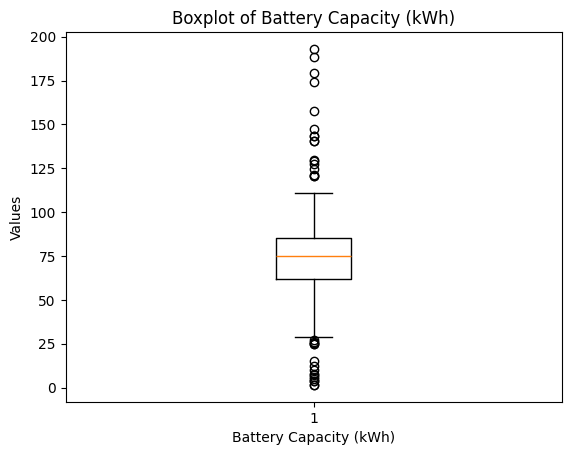

In [12]:

plt.boxplot(df['Battery Capacity (kWh)'])
plt.title('Boxplot of Battery Capacity (kWh)')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Values')
plt.show()

In [13]:

Q1 = df['Battery Capacity (kWh)'].quantile(0.25)
Q3 = df['Battery Capacity (kWh)'].quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_1 = df[(df['Battery Capacity (kWh)'] >= lower_bound) & (df['Battery Capacity (kWh)'] <= upper_bound)]


In [15]:
df_1.shape

(1287, 16)

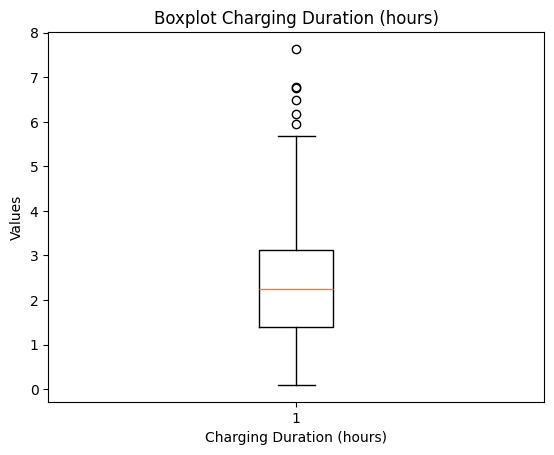

In [16]:

plt.boxplot(df['Charging Duration (hours)'])
plt.title('Boxplot Charging Duration (hours)')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Values')
plt.show()

In [17]:

Q1 = df_1['Charging Duration (hours)'].quantile(0.25)
Q3 = df_1['Charging Duration (hours)'].quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_2 = df_1[(df_1['Charging Duration (hours)'] >= lower_bound) & (df_1['Charging Duration (hours)'] <= upper_bound)]

In [18]:
df_2.shape

(1280, 16)

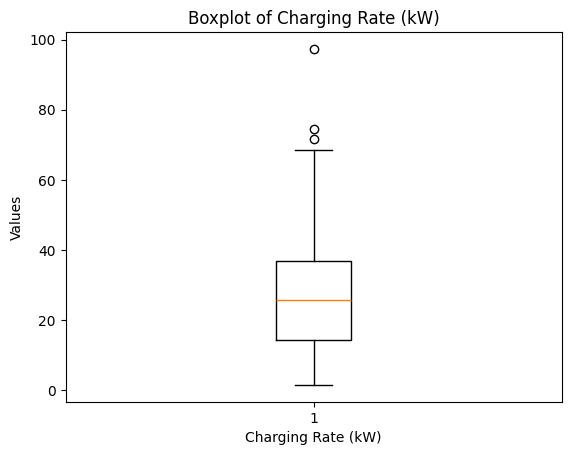

In [19]:

plt.boxplot(df['Charging Rate (kW)'])
plt.title('Boxplot of Charging Rate (kW)')
plt.xlabel('Charging Rate (kW)')
plt.ylabel('Values')
plt.show()

In [20]:

Q1 = df_2['Charging Rate (kW)'].quantile(0.25)
Q3 = df_2['Charging Rate (kW)'].quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_3 = df_2[(df_2['Charging Rate (kW)'] >= lower_bound) & (df_2['Charging Rate (kW)'] <= upper_bound)]

In [21]:
df_3.shape

(1277, 16)

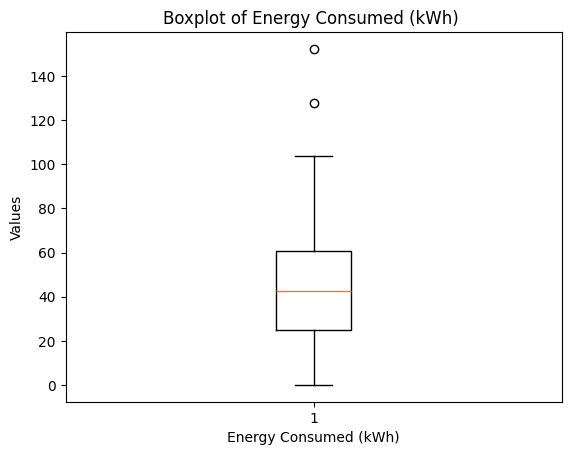

In [22]:

plt.boxplot(df['Energy Consumed (kWh)'])
plt.title('Boxplot of Energy Consumed (kWh) ')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Values')
plt.show()

In [23]:

Q1 = df_3['Energy Consumed (kWh)'].quantile(0.25)
Q3 = df_3['Energy Consumed (kWh)'].quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_4 = df_3[(df_3['Energy Consumed (kWh)'] >= lower_bound) & (df_3['Energy Consumed (kWh)'] <= upper_bound)]

In [24]:
df_4.shape

(1275, 16)

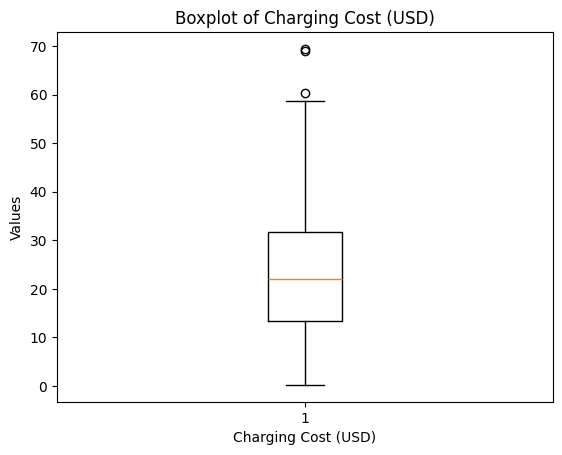

In [25]:

plt.boxplot(df['Charging Cost (USD)'])
plt.title('Boxplot of Charging Cost (USD)')
plt.xlabel('Charging Cost (USD)')
plt.ylabel('Values')
plt.show()

In [27]:

Q1 = df_4['Charging Cost (USD)'].quantile(0.25)
Q3 = df_4['Charging Cost (USD)'].quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_5 = df_4[(df_4['Charging Cost (USD)'] >= lower_bound) & (df_4['Charging Cost (USD)'] <= upper_bound)]

In [28]:
df_5.shape

(1272, 16)

What is the average charging duration for all sessions?

In [30]:
avg_charging_duration = df['Charging Duration (hours)'].mean()
avg_charging_duration

2.2693773889553506

What is the sum and average of battery capacities across different vehicle models?

In [31]:
battery_capacity_stats_by_model = df.groupby('Vehicle Model')['Battery Capacity (kWh)'].agg(['sum', 'mean'])
battery_capacity_stats_by_model

,sum,mean
Vehicle Model,,
BMW i3,19809.169057,76.779725
Chevy Bolt,18919.842157,73.905633
Hyundai Kona,20055.191567,75.395457
Nissan Leaf,18937.318036,72.835839
Tesla Model 3,20664.272239,73.800972


What is the average charging rate per type of charger?

In [32]:
average_charging_rate = df.groupby('Charger Type')['Charging Rate (kW)'].mean()
average_charging_rate

,Charging Rate (kW)
Charger Type,
DC Fast Charger,25.556951
Level 1,25.978709
Level 2,26.296383


What is the sum of charging costs incurred by each type of user ?

In [33]:
total_cost_by_user_type = df.groupby('User Type')['Charging Cost (USD)'].sum()
total_cost_by_user_type


,Charging Cost (USD)
User Type,
Casual Driver,9230.017561
Commuter,10829.994118
Long-Distance Traveler,9707.772628


Visualization

Univariant Analysis

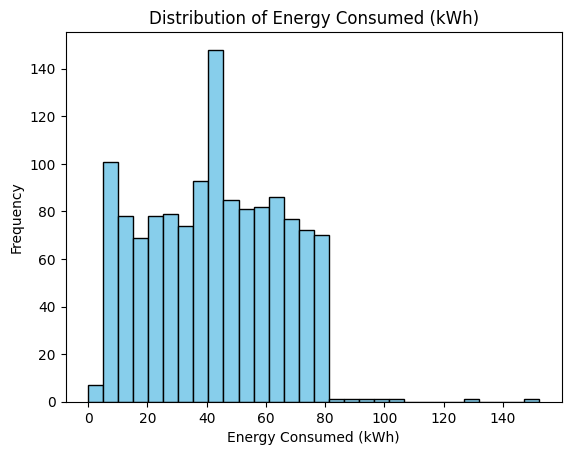

In [34]:
plt.hist(df_1['Energy Consumed (kWh)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Energy Consumed (kWh)')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Frequency')
plt.show()

Bivariant Analysis

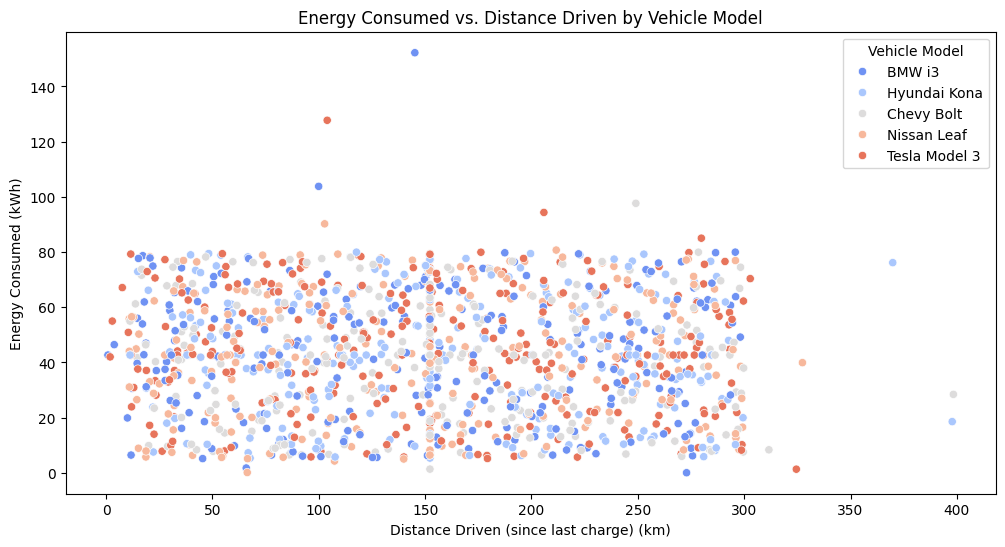

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_1, x='Distance Driven (since last charge) (km)', y='Energy Consumed (kWh)', hue='Vehicle Model', palette='coolwarm')
plt.title("Energy Consumed vs. Distance Driven by Vehicle Model")
plt.xlabel("Distance Driven (since last charge) (km)")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

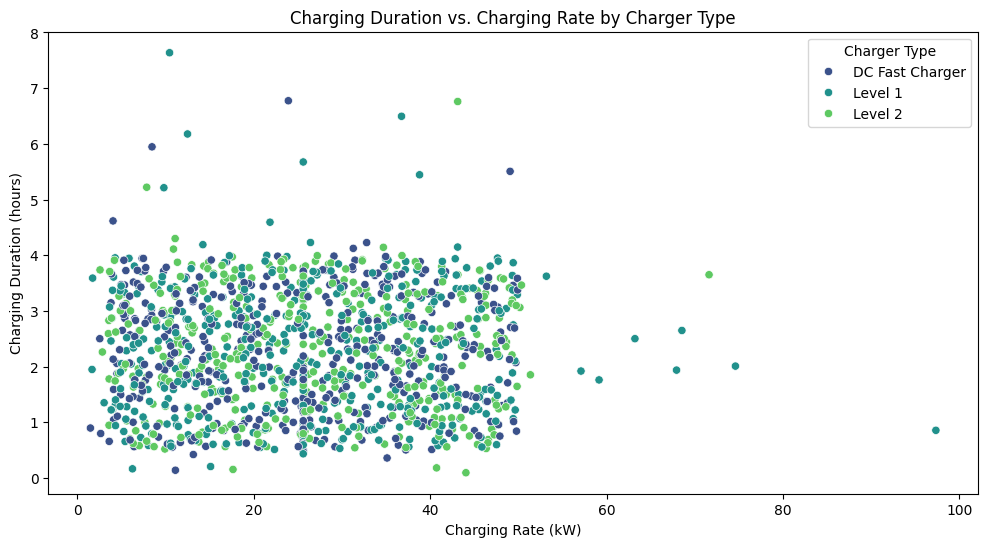

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_1, x='Charging Rate (kW)', y='Charging Duration (hours)', hue='Charger Type', palette='viridis')
plt.title("Charging Duration vs. Charging Rate by Charger Type")
plt.xlabel("Charging Rate (kW)")
plt.ylabel("Charging Duration (hours)")
plt.show()

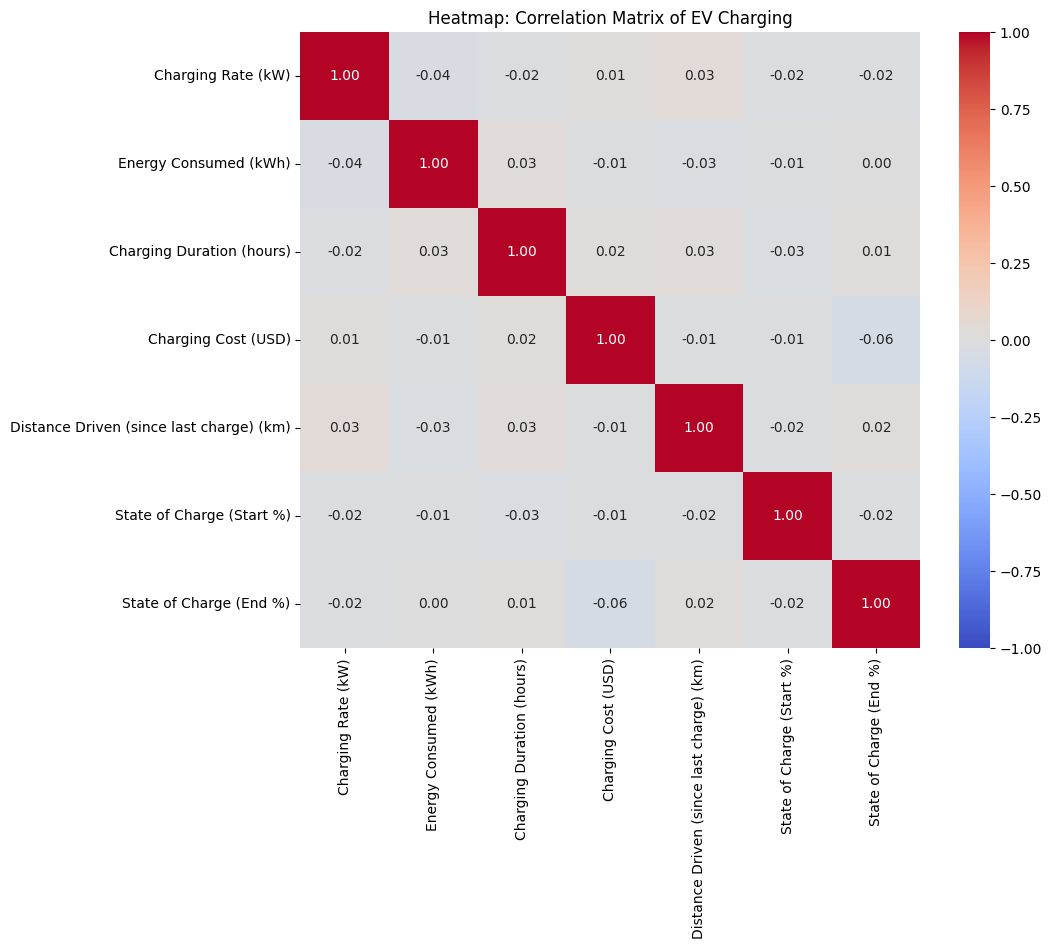

In [37]:
numerical_features = df_1[['Charging Rate (kW)', 'Energy Consumed (kWh)', 'Charging Duration (hours)','Charging Cost (USD)', 'Distance Driven (since last charge) (km)',
                           'State of Charge (Start %)', 'State of Charge (End %)']]

corr = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Heatmap: Correlation Matrix of EV Charging')
plt.show()